In [1]:
from IPython.display import HTML

In [2]:
HTML("""
<style>
    #notebook-container {
    width: 80% !important;
}
.dataTable {
    width: 100% !important;
}
.dataTables_scrollBody {
    width: 100% !important;
}
.dataTables_scrollHead {
    width: 100% !important;
}
.dataTables_filter {
   float: right !important;
}
.output_html {
    max-width: calc(100%) !important;
}
.rendered{
    font-size: 125%;
}
</style>
""")

In [3]:
html1 = '<img src="https://images.theconversation.com/files/45159/original/rptgtpxd-1396254731.jpg" width="900" style="margin-left:auto; margin-right:auto"/>'
HTML(html1)

# A quick analysis of my reading habits

This project aims to answer a few basic questions about my reading habits over the past few years. Specifically, it looks at the books I've read since the end of 2020, when I started keeping track of things. I've compiled a spreadsheet that contains basic information such as Title, Author, Genre, Format, etc. in the hopes of perhaps identifying trends of patterns in my reading habits. Additionally, this helps me see how my tastes change over time. Some basic questions I hope to answer are the following:

* What do I read the most?
* What format do I prefer?
* Are there any Genre-Sub-Genre pairs I tend to gravitate towards?
* Who is my most read author?
* How long does it take me to read books?
* Do I read more during a certain time of year?

So let's get started! Here is a quick list of the 10 most recent books I've read:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plot

df = pd.read_csv('BookList.csv')

#removes any blank rows or books I never finished/rated
df = df[df['Rating'].notnull()]

# convert columns to correct (or better) data types
df[['Year', 'Pages']] = df[['Year', 'Pages']].apply(pd.to_numeric, downcast='integer')
df['Duration'] = df['Duration'].apply(pd.to_numeric, downcast='integer')
df['Rating'] = df['Rating'].apply(pd.to_numeric, downcast='float')
df['Start Date']= pd.to_datetime(df['Start Date'])
df['Finish Date']= pd.to_datetime(df['Finish Date'])
df.tail(10)

,Title,Author,Publisher,Genre,Sub-Genre,Year,Pages,Format,Start Date,Finish Date,Duration,Rating
57,A Heartbreaking Work of Staggering Genius,Dave Eggers,Vintage,Fiction,Contemporary,2000,437,Physical,2024-02-17,2024-02-29,13.0,6.0
58,Tiny Beautiful Things: Advice on Love and Life...,Cheryl Strayed,Knopf Doubleday Publishing Group,Nonfiction,Self Help,2012,353,Physical,2024-03-01,2024-03-14,14.0,8.5
59,Correction,Thomas Bernhard,Vintage,Fiction,German Literature,1975,271,eBook,2024-03-15,2024-04-01,18.0,9.0
60,The Emigrants,W.G. Sebald,Vintage,Fiction,German Literature,1992,159,eBook,2024-04-02,2024-04-14,13.0,8.0
61,1Q84 - Part 1,Haruki Murakami,Knopf Doubleday Publishing Group,Fiction,Fantasy,2009,387,Physical,2024-04-15,2024-04-23,9.0,7.5
62,1Q84 - Part 2,Haruki Murakami,Knopf Doubleday Publishing Group,Fiction,Fantasy,2009,352,Physical,2024-04-23,2024-04-30,8.0,7.5
63,1Q84 - Part 3,Haruki Murakami,Knopf Doubleday Publishing Group,Fiction,Fantasy,2009,418,Physical,2024-04-30,2024-05-09,10.0,8.0
64,The Wisdom of Insecurity,Alan Watts,Vintage,Philosophy,Nonfiction,1951,152,Physical,2024-05-09,2024-05-15,7.0,7.0
65,The Order of Time,Carlo Rovelli,Riverhead Books,Science,Nonfiction,2018,212,Physical,2024-05-16,2024-05-22,7.0,7.5
67,Horus Rising,Dan Abnett,Black Library,Fiction,Science Fiction,2006,416,Physical,2024-06-09,2024-06-11,3.0,8.5


### Basic Statistics - What do I read the most of?

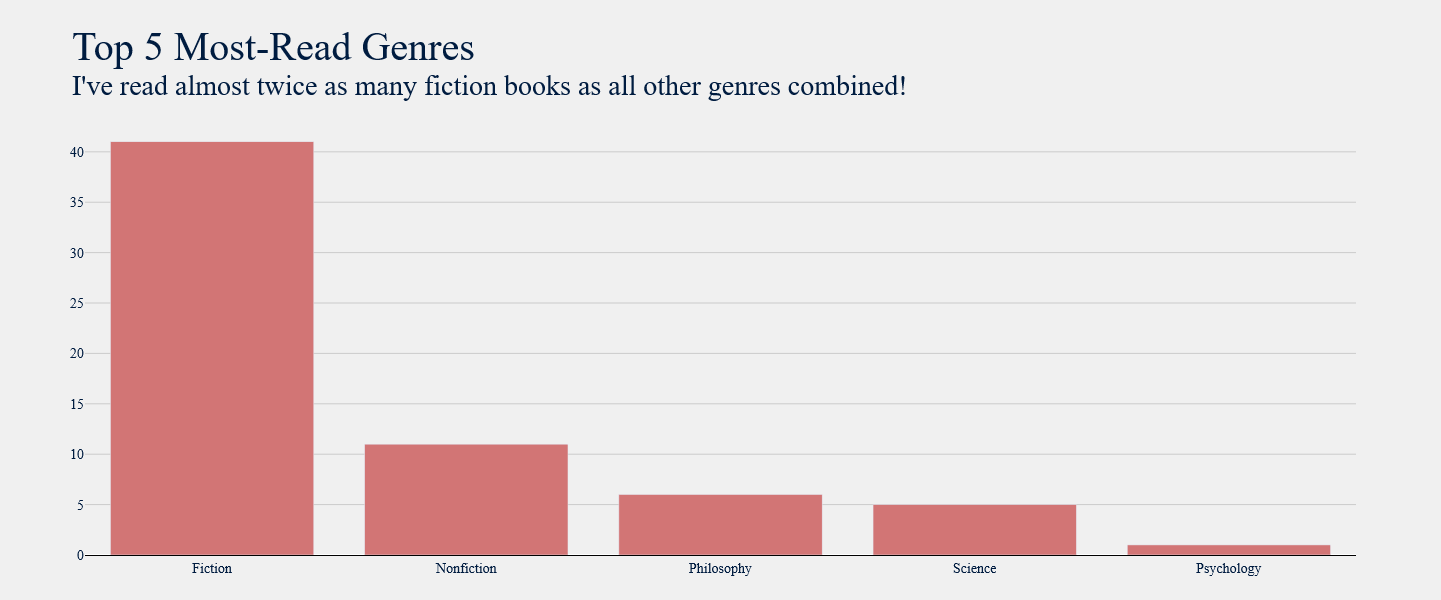

In [5]:
title = "Top 5 Most-Read Genres"
sub = f"I've read almost twice as many fiction books as all other genres combined!"
plot.gen_bar_graph(df, 'Genre', title, sub, color="#d27575")

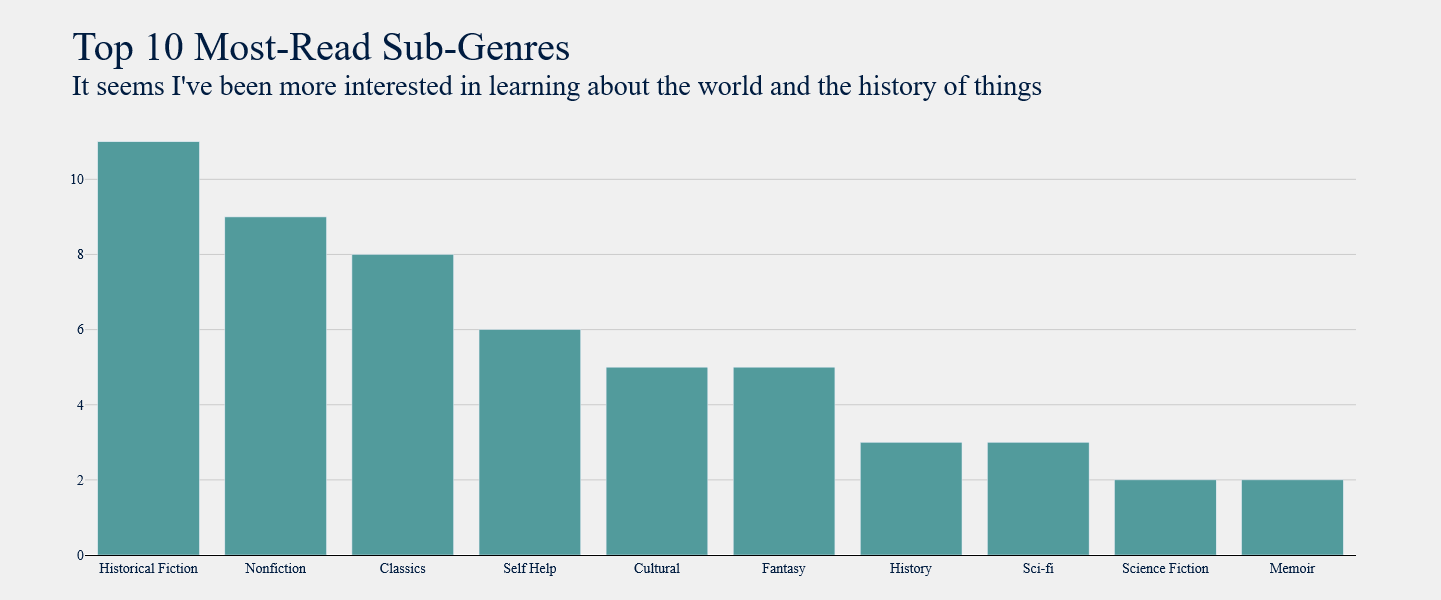

In [6]:
title = "Top 10 Most-Read Sub-Genres"
sub = f"It seems I've been more interested in learning about the world and the history of things"
plot.gen_bar_graph(df, 'Sub-Genre', title, sub, 10, color="#529b9c")

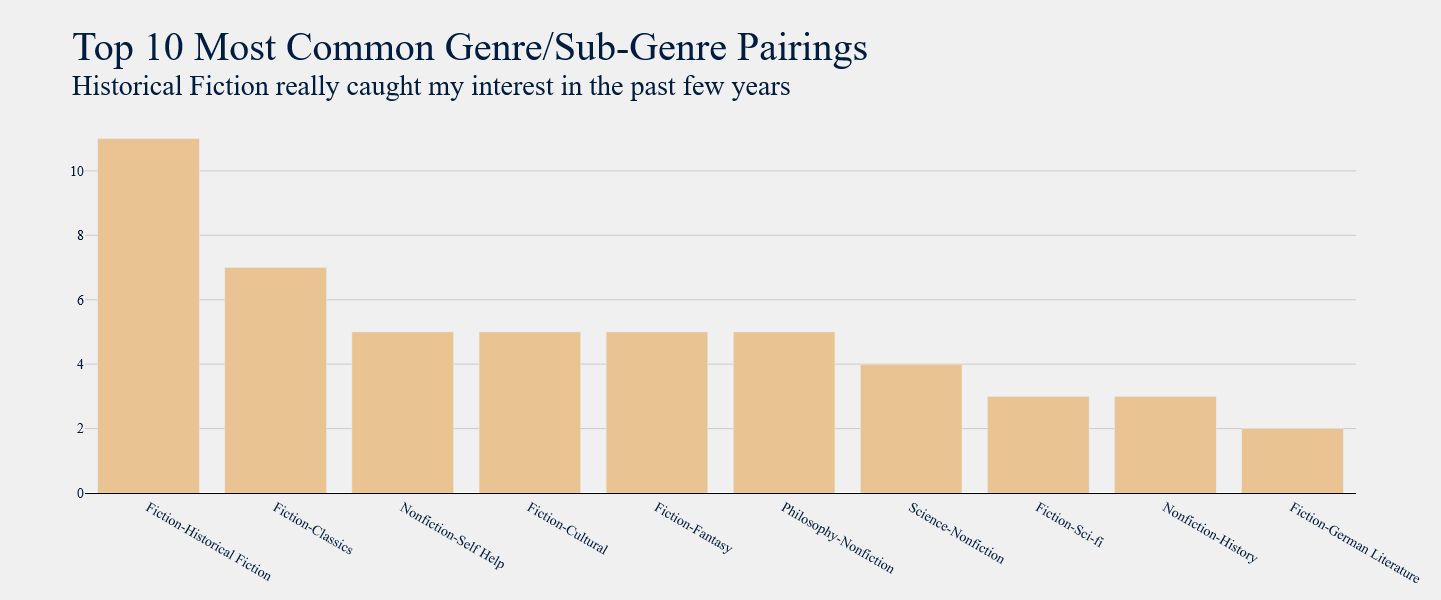

In [7]:
df['Genre Pair'] = df['Genre'] + '-' + df['Sub-Genre']
title = "Top 10 Most Common Genre/Sub-Genre Pairings"
sub = f"Historical Fiction really caught my interest in the past few years"
plot.gen_bar_graph(df, 'Genre Pair', title, sub, num=10, color="#eac392")

### Do I have a favorite author?

This one can  be a little misleading, because I know for a fact that I have read a ton of Neil Gaiman's novels, however I didn't track any of them in my spreadsheet because I read them well over a decade ago (I only started tracking data for this project in 2020). So this gives you a more updated look at who I'm reading recently.

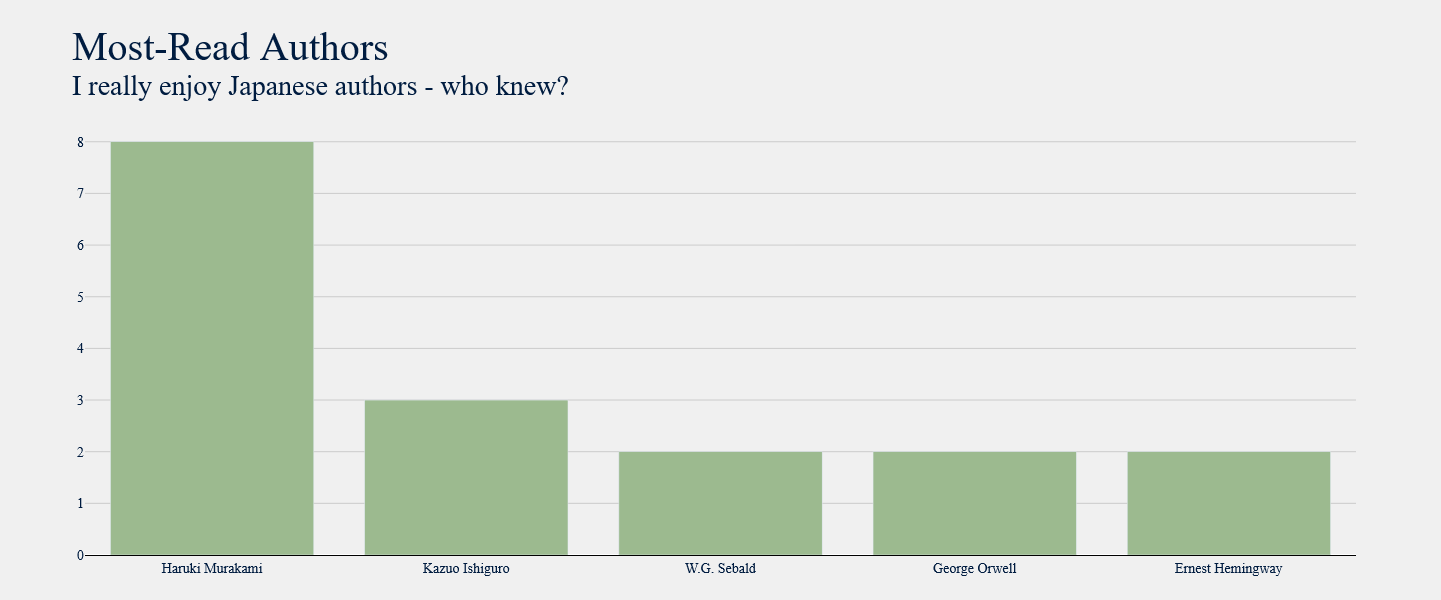

In [8]:
title = "Most-Read Authors"
sub = f"I really enjoy Japanese authors - who knew?"
plot.gen_bar_graph(df, 'Author', title, sub, color="#9cba8f")

### Do I prefer physical books, or eBooks?

In general I prefer physical books - but the reason I've read so many eBooks is because I used to be an expat in South Korea, and it was simply a matter of convenience that I have a Kindle instead of a bunch of physical books. I was moving between apartments relatively often, and apartments in Seoul can be [rather small](https://www.statista.com/statistics/644523/south-korea-living-space-per-person/), so I had limited space. Currently, I tend to buy physical books when they are more science-based, while I have more fiction books in eBook format.

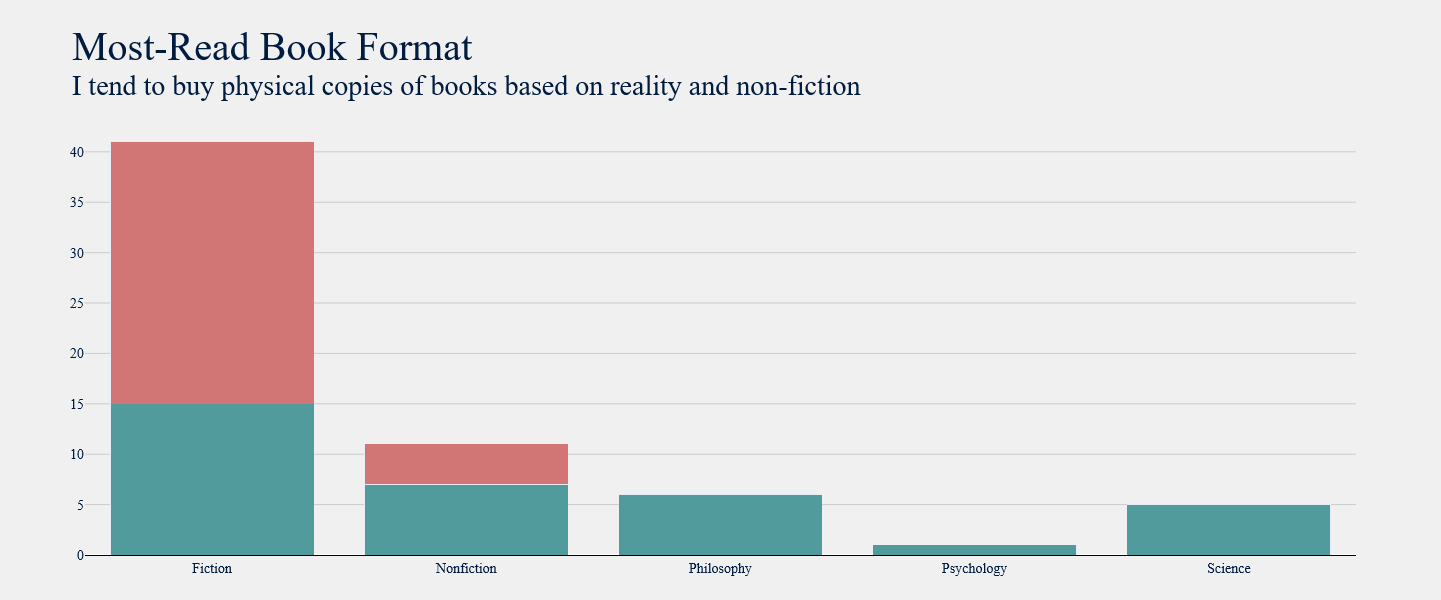

In [9]:
physical = (df[df['Format'] == 'Physical'].groupby('Genre')['Title']
            .count()
            .reset_index()
            .rename(columns={'Title':'Physical'}))
ebook = (df[df['Format'] == 'eBook'].groupby('Genre')['Title']
         .count()
         .reset_index()
         .rename(columns={'Title':'eBook'}))

format_df = pd.concat([physical, ebook['eBook']], axis=1).fillna(0).set_index('Genre')
format_df = format_df.convert_dtypes()

title = "Most-Read Book Format"
sub = f"I tend to buy physical copies of books based on reality and non-fiction"
plot.gen_stacked_bar_graph(format_df, title, sub)

### How do I rate what I've read?

I tend to base my ratings on how gripped I am whilst reading. There are many books whose content/plot might not have interested me as much, but the author's prose and writing style intrigued me (e.g. Haruki Murakami's novels). Conversely, there are also a lot of books where the content is right up my alley, but it's written in more of a straight-forward way (mostly science books). 

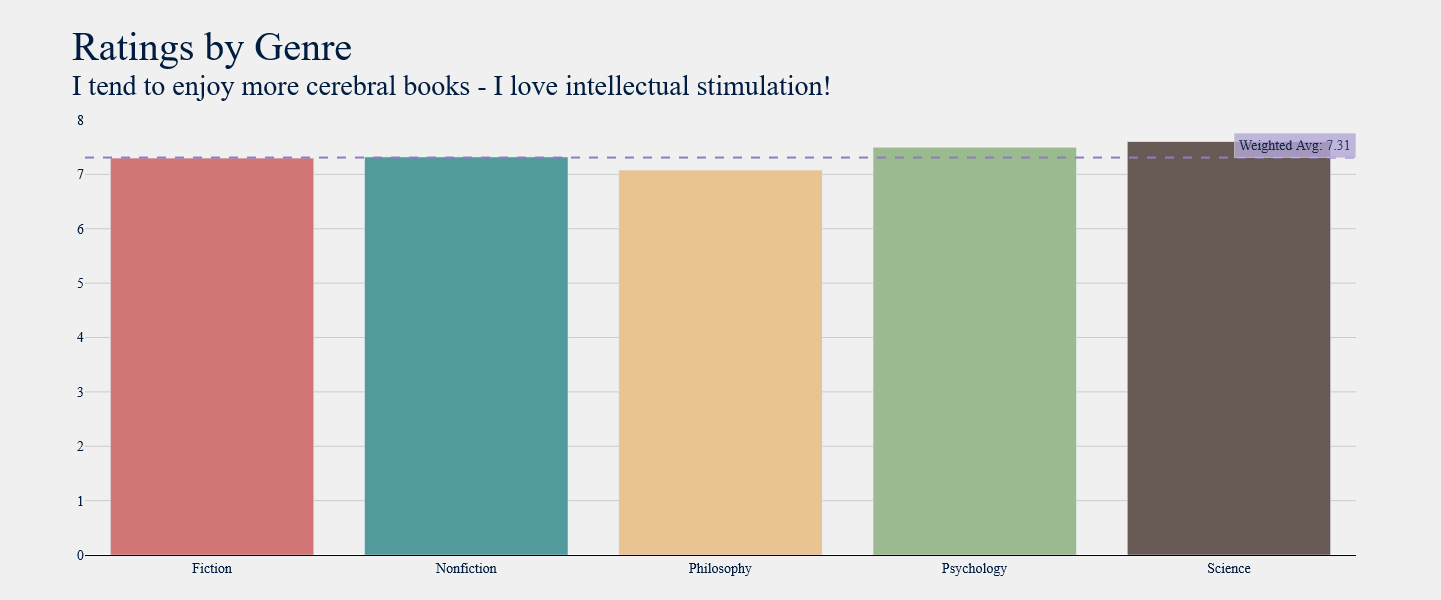

In [10]:
dfr = df.groupby('Genre')['Rating'].mean().reset_index().round(2)
dfr['Total'] = df.groupby('Genre')['Title'].count().reset_index(drop=True)

title = "Ratings by Genre"
sub = f"I tend to enjoy more cerebral books - I love intellectual stimulation!"
plot.gen_bar_graph(dfr, 'Genre', title, sub, avg=True, w_avg='Rating')

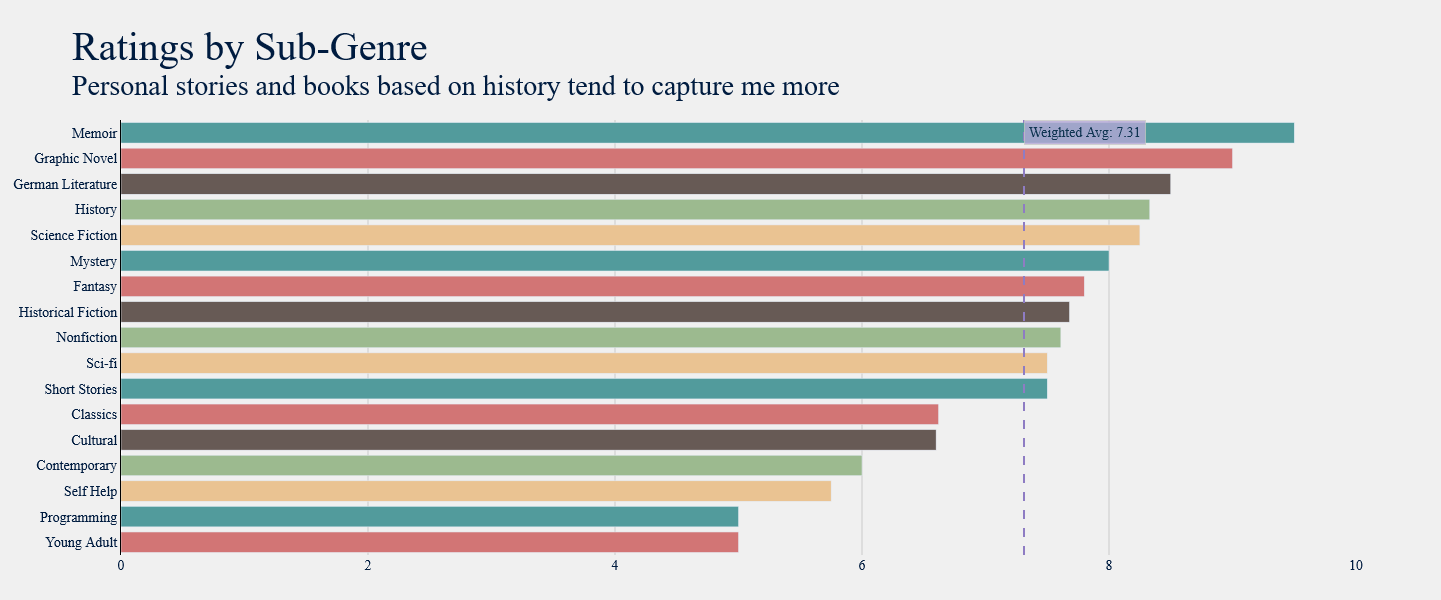

In [11]:
dfs = df.groupby('Sub-Genre')['Rating'].mean().reset_index().round(2)
dfs['Total'] = df.groupby('Sub-Genre')['Title'].count().reset_index(drop=True)
dfs = dfs.sort_values('Rating', ascending=True).reset_index(drop=True)

title = "Ratings by Sub-Genre"
sub = f"Personal stories and books based on history tend to capture me more"
plot.gen_hbar_graph(dfs, 'Sub-Genre', title, sub, avg=True, w_avg='Rating')

### How long does it take me to read?

This is an interesting one because a lot of factors go into it, which I can't quite capture in my spreadsheet. For example, philosophy books tend to take me very long to read because they can be rather dense and difficult to comprehend. Additionally, there were several instances where I needed to take a break, thus increasing the overall duration. That aside, I tend to get through books in about 2-3 weeks, depending on the genre.

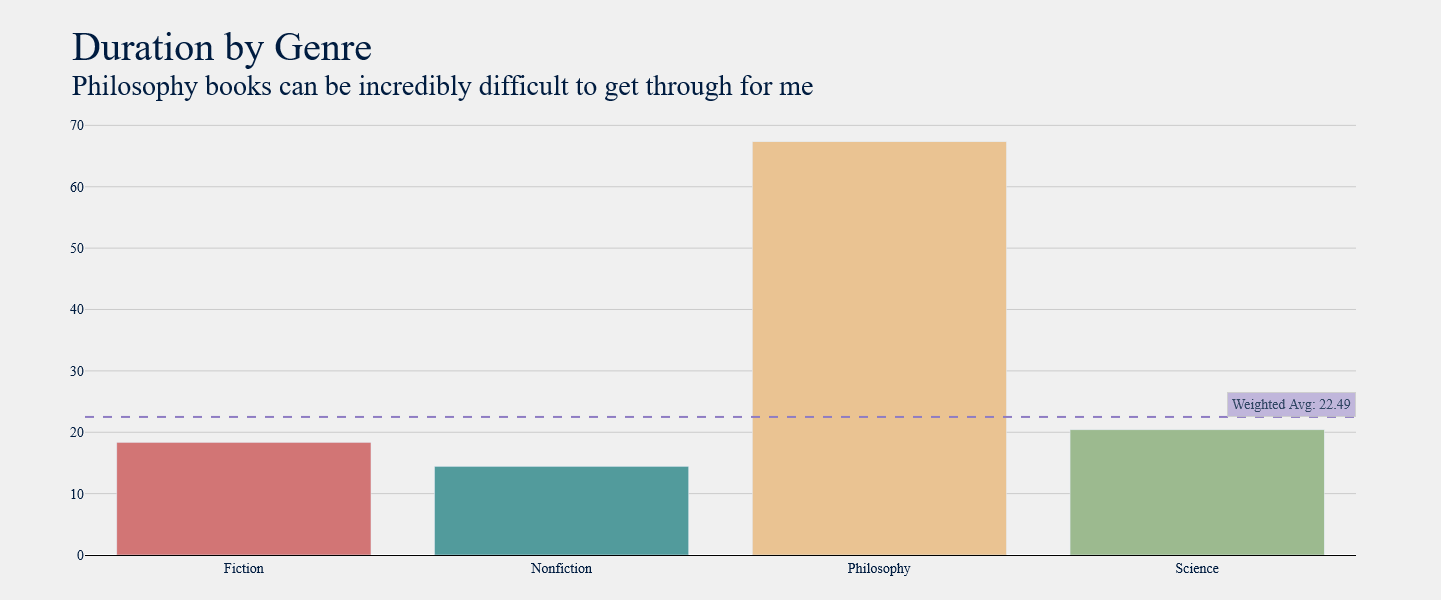

In [12]:
dft = df.groupby('Genre')['Duration'].mean().reset_index()
dft = dft[dft['Duration'].notnull()].round(2)
dft['Total'] = df.groupby('Genre')['Title'].count().reset_index(drop=True)
# dft.loc[len(dft.index)] = ['Overall', dft['Duration'].mean()]
title = "Duration by Genre"
sub = f"Philosophy books can be incredibly difficult to get through for me"
plot.gen_bar_graph(dft, 'Genre', title, sub, avg=True, w_avg='Duration')

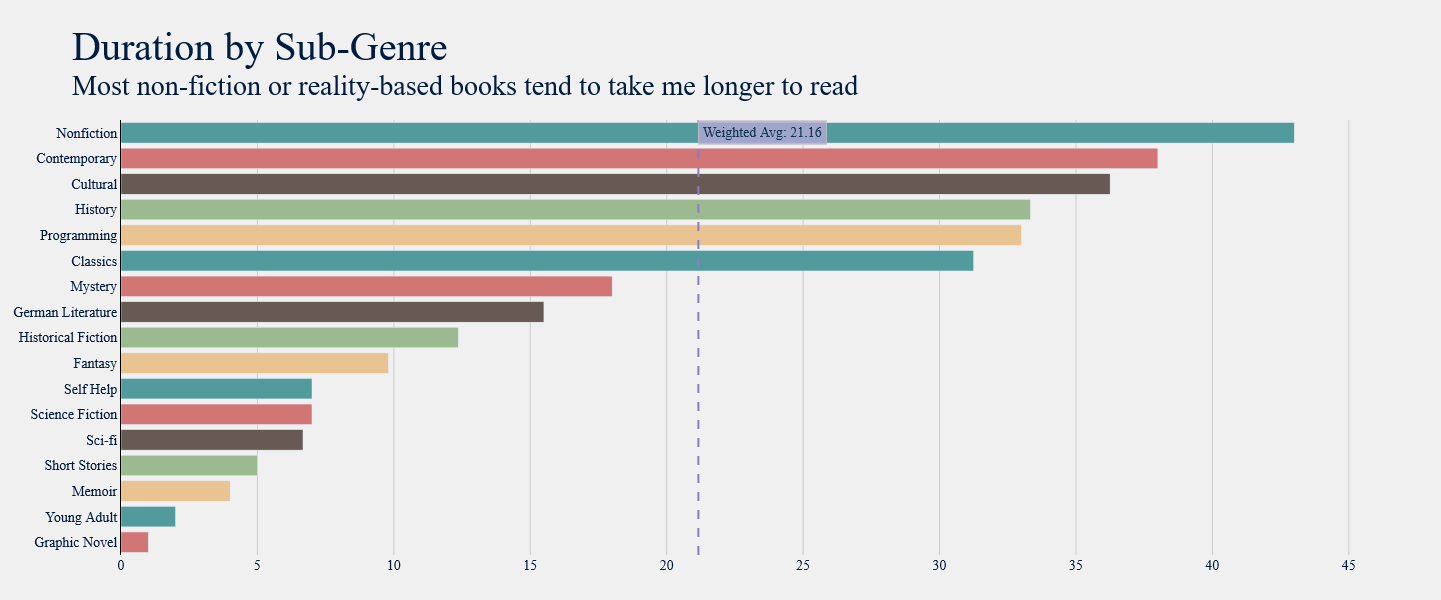

In [13]:
dfy = df.groupby('Sub-Genre')['Duration'].mean().reset_index()
dfy = dfy[dfy['Duration'].notnull()].round(2)
dfy['Total'] = df.groupby('Sub-Genre')['Title'].count().reset_index(drop=True)
dfy = dfy.sort_values('Duration', ascending=True).reset_index(drop=True)

title = "Duration by Sub-Genre"
sub = f"Most non-fiction or reality-based books tend to take me longer to read"
plot.gen_hbar_graph(dfy, 'Sub-Genre', title, sub, avg=True, w_avg='Duration')

### Do I gravitate towards a particular genre-sub-genre?

This visualization was more fun to make than to look at, as a lot of the information is a bit irrelevant. I was just curious about what the visualization would look like when laid out as a heatmap.

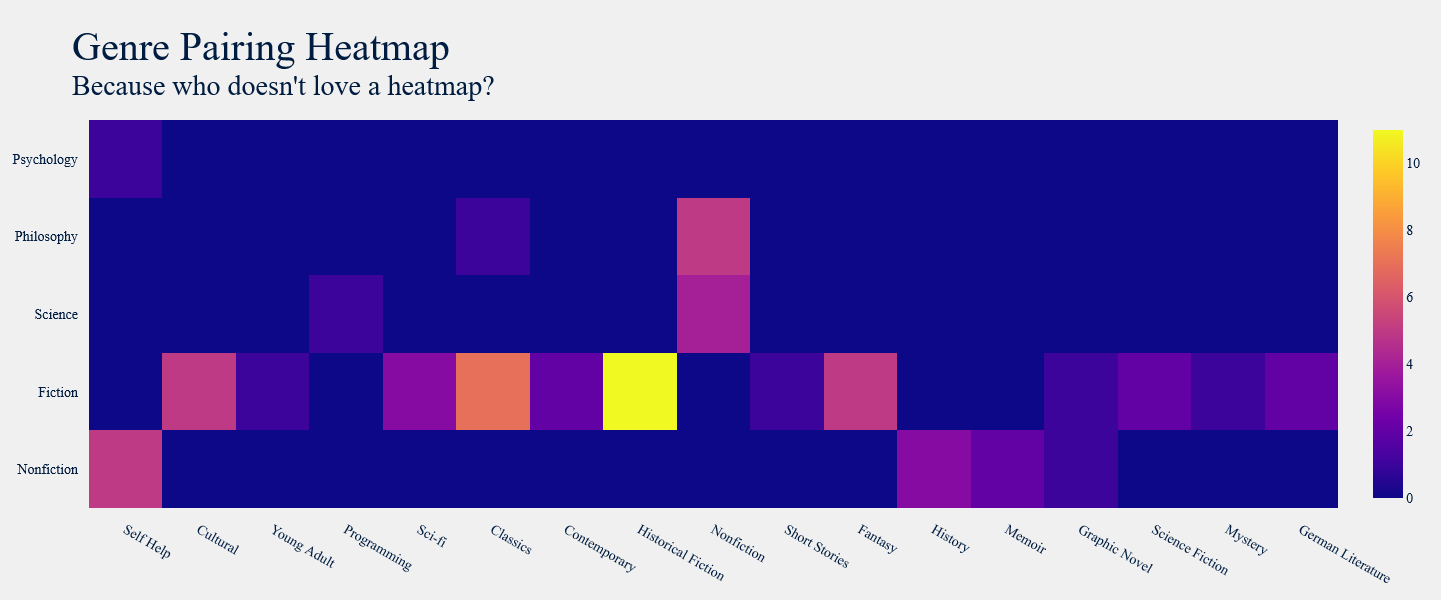

In [14]:
#get list of unique genres/subgenres 
subgenres = df['Sub-Genre'].unique()
genres = df['Genre'].unique()

#create new, NaN-filled dataframe where rows=genres, and columns=subgenres
dfh = pd.DataFrame(np.nan, columns=subgenres, index=genres)

# grp = data grouped by the two columns you want as vertical & horizontal axes
grp = df[df["Genre"].isin(genres)].groupby(["Genre", "Sub-Genre"], as_index=False)['Title'].count()

#for each row in grp (which is the count of genre-sub-genre pairs), put the count (which is 'Title') in the corresponding row/column
for idx, row in grp.iterrows():
    dfh.loc[row["Genre"], row["Sub-Genre"]] = row['Title']
    
dfh.fillna(0, inplace=True)

title = "Genre Pairing Heatmap"
sub = f"Because who doesn't love a heatmap?"
plot.gen_heatmap(dfh, title, sub)

### Does page count vary by genre?

Perhaps unsurprisingly, science books have more pages on average than other genres. Perhaps this is because the authors need more pages & time to explain their scientific concepts and ideas. The weighted average (so far) number of pages is around 260, which is a relatively decent sized page count. The average number of pages for fiction books I've read is just under that weighted average. Interestingly though, the fantasy sub-genre has almost an extra 100 pages on average compared to the next highest sub-genre, which is history. Perhaps fantasy authors enjoy fleshing out their fictitious worlds more so than history authors enjoy detailing our actual world.

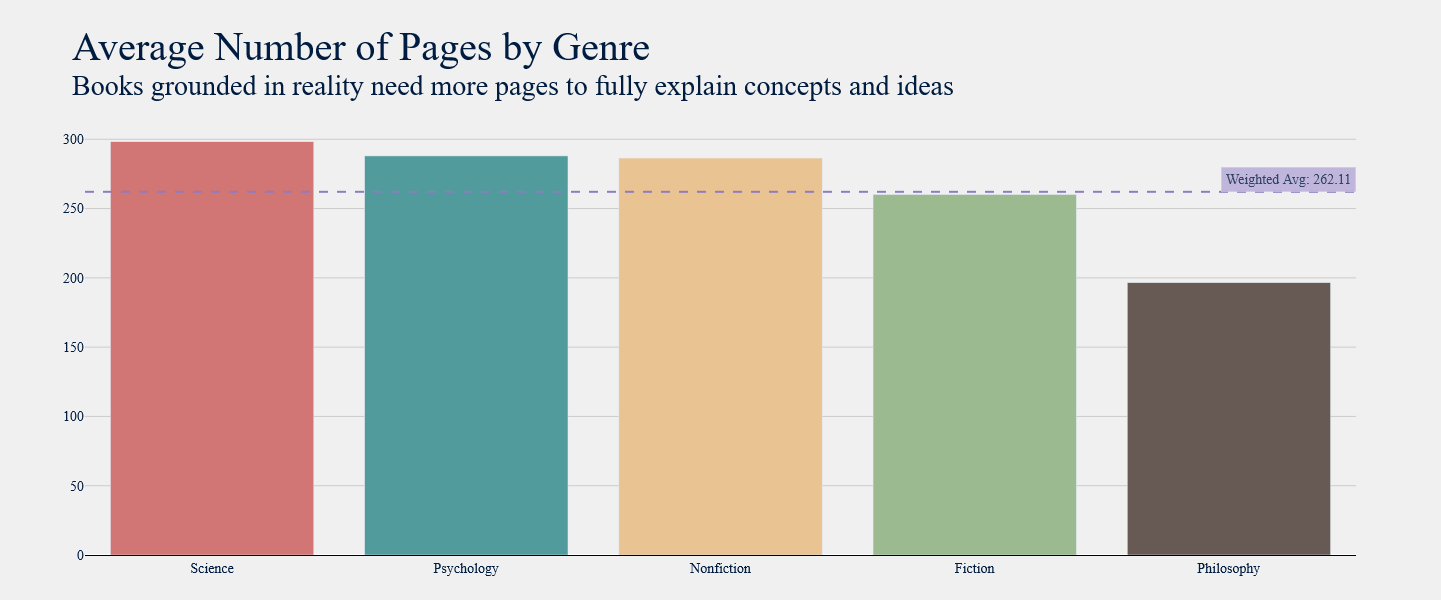

In [15]:
dfc = df.groupby('Genre')['Pages'].mean().round(2).reset_index()
dfc['Total'] = df.groupby('Genre')['Title'].count().reset_index(drop=True)
dfc = dfc.sort_values('Pages', ascending=False).reset_index(drop=True)

title = "Average Number of Pages by Genre"
sub = f"Books grounded in reality need more pages to fully explain concepts and ideas"
plot.gen_bar_graph(dfc, 'Genre', title, sub, avg=True, w_avg='Pages')

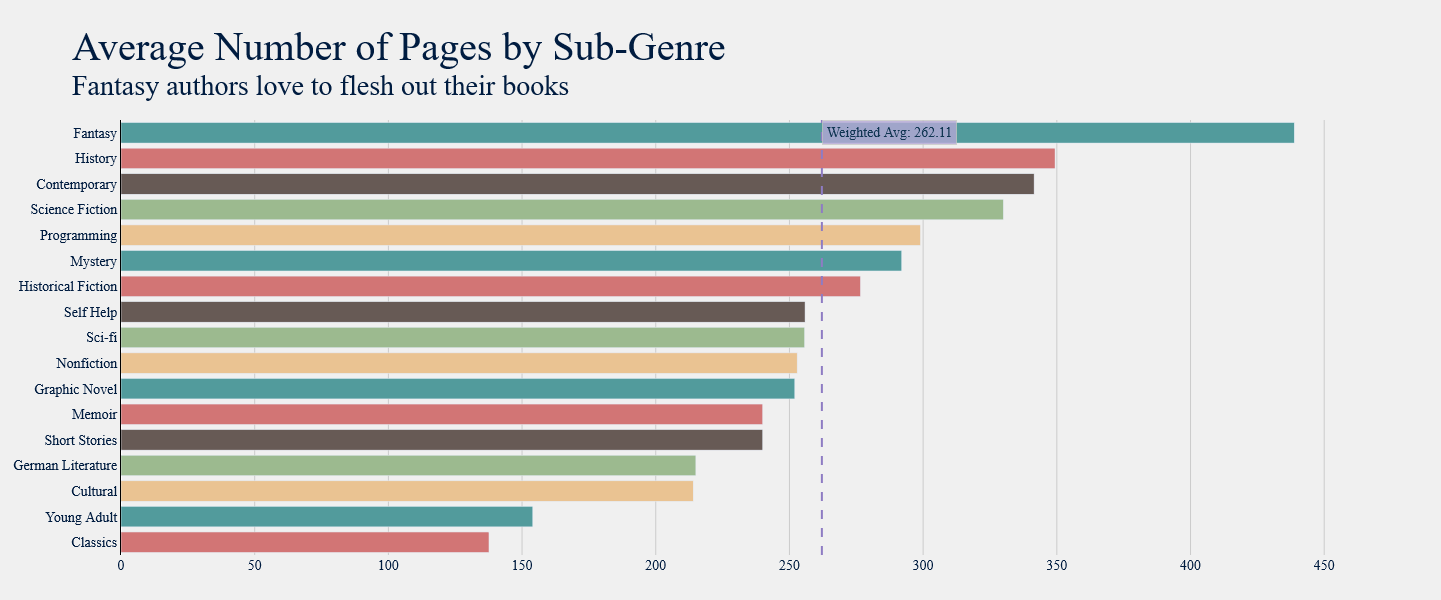

In [16]:
dfx = df.groupby('Sub-Genre')['Pages'].mean().round(2).reset_index()
dfx['Total'] = df.groupby('Sub-Genre')['Title'].count().reset_index(drop=True)
dfx = dfx.sort_values('Pages', ascending=True).reset_index(drop=True)

title = "Average Number of Pages by Sub-Genre"
sub = f"Fantasy authors love to flesh out their books"
plot.gen_hbar_graph(dfx, 'Sub-Genre', title, sub, avg=True, w_avg='Pages')

### Top Rated Books

Here is a basic list of books that I felt were very good (in my case, books that I rated an 8.0 or above). Whenever I meet another avid reader, I will almost certainly recommend a handful of these books! The books are not listed in personal preference or anything, only by their overall rating. I loved all of these books and highly recommend them!

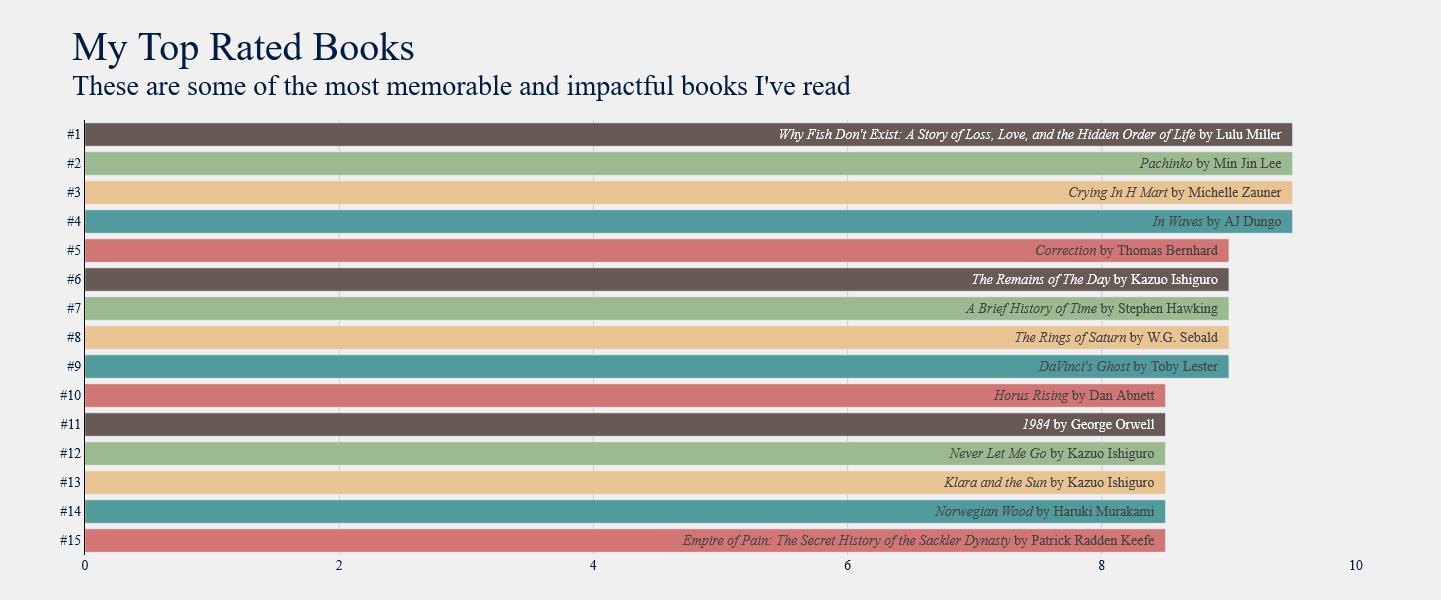

In [17]:
top_df = df[df['Rating'] >= 8.0].sort_values(by=['Rating']).tail(15).reset_index(drop=True)

title = "My Top Rated Books"
sub = f"These are some of the most memorable and impactful books I've read"
plot.top10_graph(top_df, 'Rating', 'Title', title, sub)

### How much have I read over time?

This is another interesting visualization because you can clearly see some highs and lows in my reading habits. Life got in the way numerous times, which can help explain the drop from 2021 to 2023. However, at the time of this writing (June, 2024) I'm a bit more dedicated to reading on a daily basis. I'm hoping to continuously read ~24 books a year for the rest of my life - is that ambitious? Of course it is! But that is what tracking data is for - it helps keep me on track.

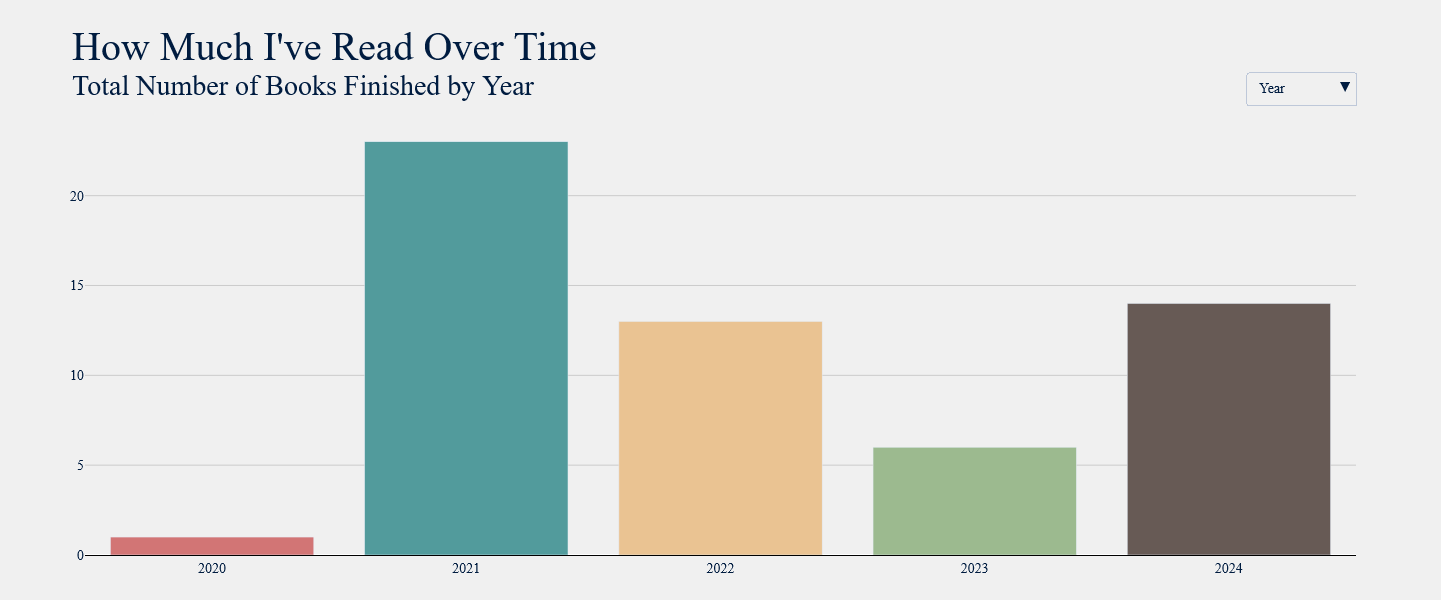

In [18]:
dfd = df[df['Start Date'].notnull()] #books that have a definied start (& end)

#group by year
by_start = dfd.groupby(dfd['Start Date'].dt.to_period('Y').rename('Date'))['Title'].count().rename('Started').reset_index()
by_finish = dfd.groupby(dfd['Finish Date'].dt.to_period('Y').rename('Date'))['Title'].count().rename('Finished').reset_index()
df_year = pd.merge(by_start, by_finish, how="outer").fillna(0).sort_values('Date').reset_index(drop=True)
df_year['Date'] = df_year['Date'].astype(str)
df_year = df_year.set_index('Date')

#group by year-month
by_start = dfd.groupby(dfd['Start Date'].dt.to_period('M').rename('Date'))['Title'].count().rename('Started').reset_index()
by_finish = dfd.groupby(dfd['Finish Date'].dt.to_period('M').rename('Date'))['Title'].count().rename('Finished').reset_index()
df_yearmonth = pd.merge(by_start, by_finish, how="outer").fillna(0).sort_values('Date').reset_index(drop=True)
df_yearmonth['Date'] = df_yearmonth['Date'].astype(str)
df_yearmonth = df_yearmonth.set_index('Date')

#combine both datasets so we can have a chart with a dropdown
df_time = pd.concat([df_year, df_yearmonth], axis=0)

title = "How Much I've Read Over Time"
sub = "Total Number of Books Finished by Year/Month"
plot.gen_time_graph(df_time, title, sub)

In [19]:
# dfp = df[df['Finish Date'].notnull()] #books that have a definied start (& end)

# #group by year
# by_start = dfp.groupby(dfp['Start Date'].dt.to_period('Y').rename('Date'))['Pages'].sum().rename('Started').reset_index()
# by_finish = dfp.groupby(dfp['Finish Date'].dt.to_period('Y').rename('Date'))['Pages'].sum().rename('Finished').reset_index()
# dfp_year = pd.merge(by_start, by_finish, how="outer").fillna(0).sort_values('Date').reset_index(drop=True)
# dfp_year['Date'] = dfp_year['Date'].astype(str)
# dfp_year = dfp_year.set_index('Date')

# #group by year-month
# by_start = dfp.groupby(dfp['Start Date'].dt.to_period('M').rename('Date'))['Pages'].sum().rename('Started').reset_index()
# by_finish = dfp.groupby(dfp['Finish Date'].dt.to_period('M').rename('Date'))['Pages'].sum().rename('Finished').reset_index()
# dfp_yearmonth = pd.merge(by_start, by_finish, how="outer").fillna(0).sort_values('Date').reset_index(drop=True)
# dfp_yearmonth['Date'] = dfp_yearmonth['Date'].astype(str)
# dfp_yearmonth = dfp_yearmonth.set_index('Date')

# #combine both datasets so we can have a chart with a dropdown
# dfp_time = pd.concat([dfp_year, dfp_yearmonth], axis=0)

# title = "How Many Pages I've Read Over Time"
# sub = "Total Number of Pages Read by Year/Month"
# plot.gen_time_graph(dfp_time, title, sub)

In [20]:
# # Clean up space
#       - name: Remove unnecessary files
#         run: |
#           rm -rf /usr/share/dotnet
#           rm -rf /opt/ghc
#           rm -rf "/usr/local/share/boost"
#           rm -rf "$AGENT_TOOLSDIRECTORY"

In [21]:
# dfa = df.groupby('Author')['Rating'].mean().reset_index().round(2)
# dfa['Total'] = df.groupby('Author')['Title'].count().reset_index(drop=True)
# dfa = dfa.sort_values('Rating',ascending=False).reset_index(drop=True)
# # np.average(dfa['Rating'], weights=dfa['Total'])
# dfa[dfa['Total']>1] #df containing average rating of authors where I've read multiple books

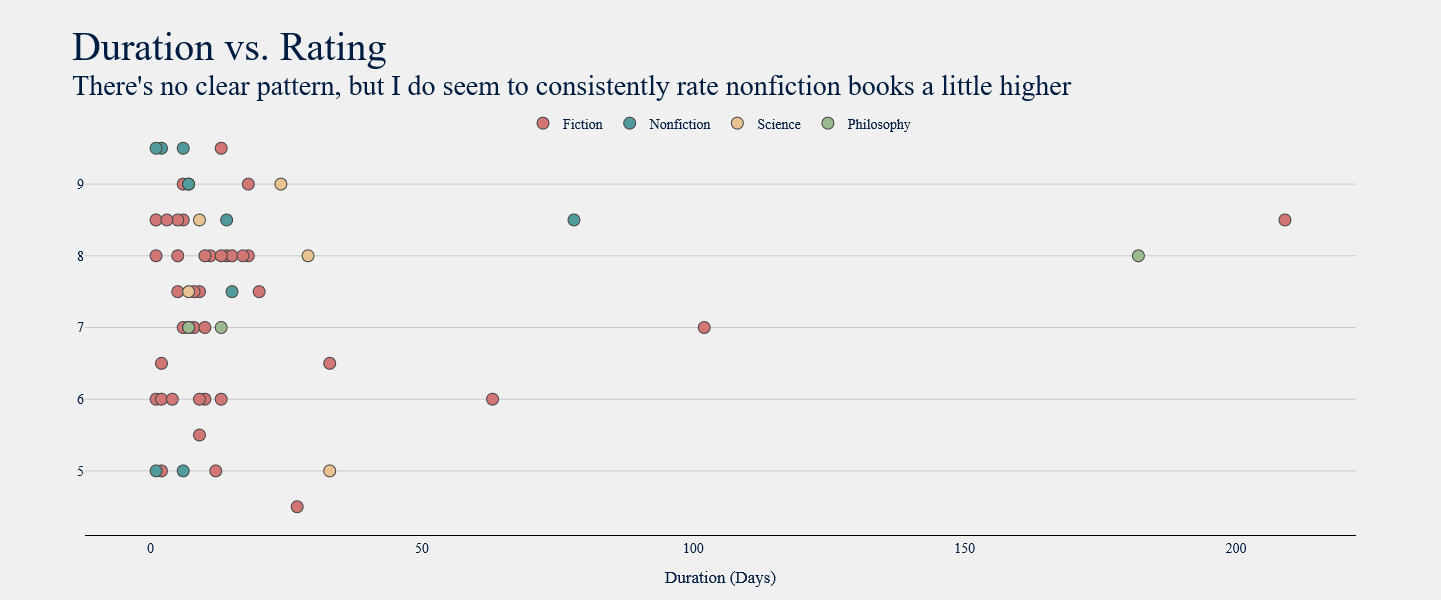

In [22]:
dfs = df[df['Finish Date'].notnull()]

title = "Duration vs. Rating"
sub = "There's no clear pattern, but I do seem to consistently rate nonfiction books a little higher"
plot.gen_scatter(dfs, title, sub)